In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DevelopmentData = pd.read_excel("DevelopmentData.xlsx", index_col=[0])
DevelopmentData.info()
DevelopmentData

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FirstObjectDistance_X   428 non-null    int64  
 1   FirstObjectDistance_Y   428 non-null    int64  
 2   SecondObjectDistance_X  428 non-null    int64  
 3   SecondObjectDistance_Y  428 non-null    int64  
 4   ThirdObjectDistance_X   428 non-null    int64  
 5   ThirdObjectDistance_Y   428 non-null    int64  
 6   FourthObjectDistance_X  428 non-null    int64  
 7   FourthObjectDistance_Y  428 non-null    int64  
 8   VehicleSpeed            428 non-null    int64  
 9   FirstObjectSpeed_X      428 non-null    int64  
 10  FirstObjectSpeed_Y      428 non-null    int64  
 11  SecondObjectSpeed_X     428 non-null    int64  
 12  SecondObjectSpeed_Y     428 non-null    int64  
 13  ThirdObjectSpeed_X      428 non-null    int64  
 14  ThirdObjectSpeed_Y      428 non-null    in

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,8211,1444,5455,-1153,3103,-1237,12024,1715,0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,8208,1443,5455,-1153,3102,-1237,0,0,0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,8211,1444,5453,-1160,3104,-1232,0,0,0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,8209,1445,5452,-1166,3104,-1232,0,0,0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,8209,1445,5452,-1167,3106,-1225,0,0,0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,782,-589,9912,-2071,0,0,1145,-733,0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,825,-619,9911,-2065,0,0,1144,-733,0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,820,-631,9906,-2060,0,0,1146,-730,0,674,-153,10,31,0,0,18,-5,-0.001343,72.972855
426,840,-644,9902,-2047,0,0,1145,-730,0,672,-129,11,35,0,0,19,-3,-0.001343,73.057103


In [3]:
dists = ["FirstObjectDistance_X", "FirstObjectDistance_Y","SecondObjectDistance_X", "SecondObjectDistance_Y","ThirdObjectDistance_X", "ThirdObjectDistance_Y","FourthObjectDistance_X", "FourthObjectDistance_Y"]
for  dist in dists:
    DevelopmentData[dist] /= 128
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0,674,-153,10,31,0,0,18,-5,-0.001343,72.972855
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0,672,-129,11,35,0,0,19,-3,-0.001343,73.057103


In [4]:
DevelopmentData["VehicleSpeed"] /= 256
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-2,0,4,1,1,7,7,0,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-4,0,-2,3,0,6,0,0,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-3,0,-1,-9,5,8,0,0,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-4,0,0,-14,3,12,0,0,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0,1,0,-11,8,16,0,0,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,280,-176,10,34,0,0,1,-10,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,696,-153,3,38,0,0,7,-5,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,674,-153,10,31,0,0,18,-5,-0.001343,72.972855
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0.0,672,-129,11,35,0,0,19,-3,-0.001343,73.057103


In [5]:
vels = ["FirstObjectSpeed_X", "FirstObjectSpeed_Y","SecondObjectSpeed_X", "SecondObjectSpeed_Y","ThirdObjectSpeed_X", "ThirdObjectSpeed_Y","FourthObjectSpeed_X", "FourthObjectSpeed_Y"]

for vel in vels:
    DevelopmentData[vel] /= 256

In [6]:
DevelopmentData["Timestamp"] -= DevelopmentData.Timestamp.min()
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,0.000000
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,0.094456
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,0.188222
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,0.281266
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,0.377212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,39.562973
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,39.647940
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,39.731351
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0.0,2.625000,-0.503906,0.042969,0.136719,0.000000,0.000000,0.074219,-0.011719,-0.001343,39.815599


In [7]:
DevelopmentData["TimestampDiff"] = DevelopmentData.Timestamp.diff()
DevelopmentData

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp,TimestampDiff
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,0.000000,NaN
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,0.094456,0.094456
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,0.188222,0.093766
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,0.281266,0.093044
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,0.377212,0.095946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,39.562973,0.082599
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,39.647940,0.084966
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,39.731351,0.083411
426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,0.0,2.625000,-0.503906,0.042969,0.136719,0.000000,0.000000,0.074219,-0.011719,-0.001343,39.815599,0.084248


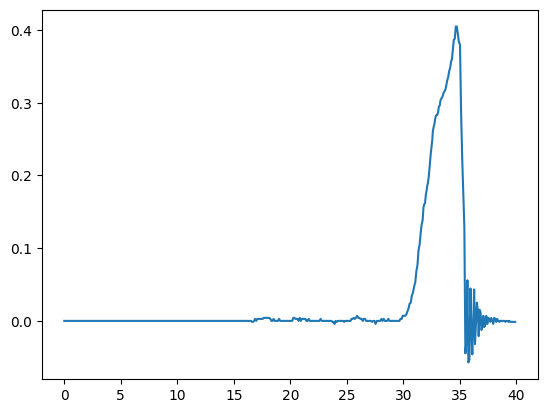

In [8]:
plt.plot(DevelopmentData.Timestamp, DevelopmentData.YawRate)

plt.show()

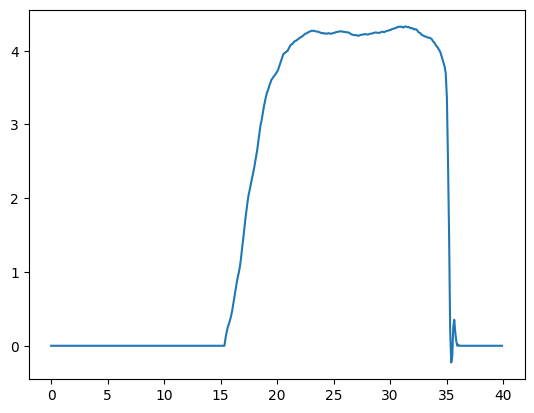

In [9]:
plt.plot(DevelopmentData.Timestamp, DevelopmentData.VehicleSpeed)

plt.show()

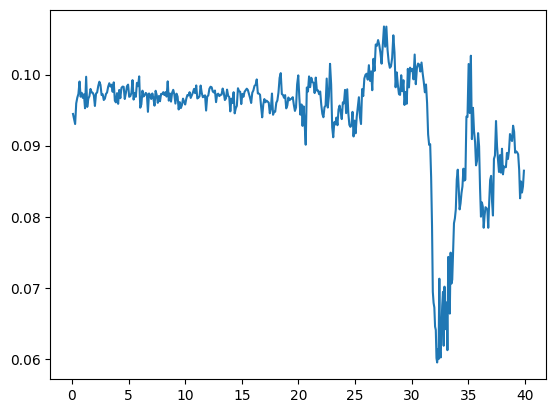

In [10]:
plt.plot(DevelopmentData.Timestamp,DevelopmentData.Timestamp.diff())
plt.show()

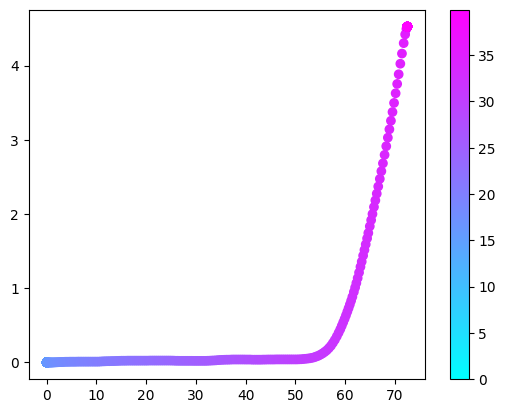

In [11]:
posx = [0.0]
posy = [0.0]
for index, row in DevelopmentData.iterrows():
    if index!=0:
        posx.append(posx[index-1] + DevelopmentData.iloc[index-1].VehicleSpeed*row.TimestampDiff*np.cos(DevelopmentData.iloc[index-1].YawRate))
        posy.append(posy[index-1] + DevelopmentData.iloc[index-1].VehicleSpeed*row.TimestampDiff*np.sin(DevelopmentData.iloc[index-1].YawRate))
plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool")
plt.colorbar()
plt.show()

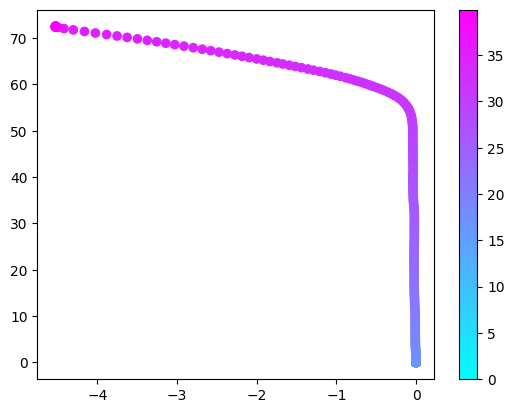

In [13]:
o1_x = DevelopmentData.FirstObjectDistance_X[0]
o1_y = DevelopmentData.FirstObjectDistance_Y[0]


In [12]:
plt.scatter(posx+DevelopmentData.FirstObjectDistance_X, posy+DevelopmentData.FirstObjectDistance_Y, c=DevelopmentData.Timestamp, cmap="viridis")
plt.colorbar()
plt.show()

In [13]:
plt.scatter(posx+DevelopmentData.SecondObjectDistance_X, posy+DevelopmentData.SecondObjectDistance_Y, c=DevelopmentData.Timestamp, cmap="viridis")
plt.colorbar()
plt.show()

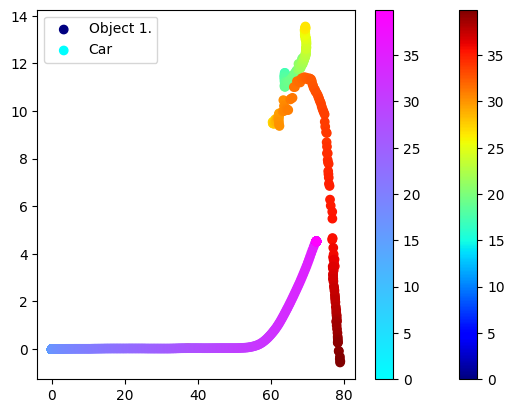

In [14]:
plt.scatter(posx + DevelopmentData.ThirdObjectDistance_X, posy + DevelopmentData.ThirdObjectDistance_Y, c=DevelopmentData.Timestamp, cmap="viridis")
plt.colorbar()
plt.show()

In [24]:
plt.scatter(DevelopmentData.FourthObjectDistance_X, DevelopmentData.FourthObjectDistance_Y, c=DevelopmentData.Timestamp, cmap="viridis", label="Object 4.")
plt.colorbar()
plt.scatter(posx, posy, c=DevelopmentData.Timestamp, cmap="cool", label="Yes")
plt.colorbar()
plt.legend()
plt.show()

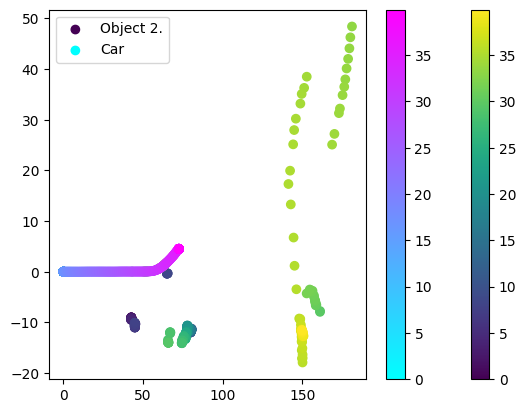

In [27]:
DevelopmentData.to_csv("DevelopmentData_modded.csv", index=False)
DevelopmentData.to_excel("DevelopmentData_final.xlsx", index=False)